# **CLAIMS CLASSIFICATION PROJECT**
**Milestone 6 - Machine Learning Model Outcomes**

The client has requested that I build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, the company can reduce the backlog of user reports and prioritize them more efficiently.

A notebook was structured and prepared to help me in this final project milestone. It includes questions which will help me to prepare the executive summary from this milestone.

**The purpose** of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a client's video presents a "claim" or presents an "opinion".


*I divided this activity in three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request
* Should the objective of the model be adjusted?

**Part 2:** Feature engineering
* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling
* Build the models, evaluate them, and advise on next steps

**Business need and modeling objective**
Clientok users can report videos that they believe violate the platform's terms of service. Because there are millions ok videos created and viewed every day, this means that many videos get reported—too many to be individually reviewed by a human moderator.

Analysis indicates that when authors do violate the terms of service, they're much more likely to be presenting a claim than an opinion. Therefore, it is useful to be able to determine which videos make claims and which videos are opinionThe clientTikTok wants to build a machine learning model to help identify claims and opinions. Videos that are labeled opinions will be less likely to go on to be reviewed by a human moderator. Videos that are labeled as claims will be further sorted by a downstream process to determine whether they should get prioritized for review. For example, perhaps videos that are classified as claims would then be ranked by how many times they were reported, then the top x% would be reviewed by a human each day.

A machine learning model would greatly assist in the effort to present human moderators with videos that are most likely to be in violathe companyf TikTok's terms of 

**Modeling design and target variable**

The data dictionary shows that there is a column calle'd claim_stat'us. This is a binary value that indicates whether a video is a claim or an opinion. This will be the target variable. In other words, for each video, the model should predict whether the video is a claim or an opinion.

This is a classification task because the model is predicting a binary cla
**Select an evaluation metric**

To determine which evaluation metric might be bestI should , consider how the model might be wrong. There are two possibilities for bad predictions:

False positives: When the model predicts a video is a claim when in fact it is an opi.nion
False negatives: When the model predicts a video is an opinion when in fact it is a .


**What are the ethical implications of building the model?**
In the given scenario, it's better for the model to predict false positives when it makes a mistake, and worse for it to predict false negatives. It's very important to identify videos that break the terms of service, even if that means some opinion videos are misclassified as claims. The worst case for an opinion misclassified as a claim is that the video goes to human review. The worst case for a claim that's misclassified as an opinion is that the video does not get reviewed and it violates the terms of service. A video that violates the terms of service would be considered posted from a "banned" author, as referenced in the data dictionary.c
Because it's more important to minimize false negatives, the model evaluation metric will be **recall**.tu
**Modeling workflow and model selection process**

Previous work with this data has revealed that there are ~20,000 videos in the sample. This is sufficient to conduct a rigorous model validation workflow, broken into the following steps:1. 

Split the data into train/validation/test sets (60/20/2. 20)
Fit models and tune hyperparameters on the training3.  set
Perform final model selection on the validatio4. n set
Assess the champion model's performance on the test setld you proceed?**


### **Task 1. Imports and data loading**

In [913]:
# Import packages for data manipulation
import pandas as pd
import numpy as np


# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Import packages for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer


# Import packages for data modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance


Now, I'll load the data from the provided csv file into a dataframe.

In [915]:
# Load dataset into dataframe
data = pd.read_csv("video_dataset.csv")

### **Task 2: Examine data, summary info, and descriptive stats**

In [917]:
# Display first few rows
data.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [918]:
# Get number of rows and columns
data.shape

(19382, 12)

In [919]:
# Get data types of columns
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

In [920]:
# Get basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [921]:
# Generate basic descriptive stats
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [922]:
# Check for missing values
data.isna().sum()


#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [923]:
# Drop rows with missing values
data = data.dropna()


In [924]:
# Display first few rows after handling missing values
data.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [925]:
# Check for duplicates
print("In the dataset there are", data.duplicated().sum(), "duplicates.")


In the dataset there are 0 duplicates.


In [926]:
# Chech for and handle outliers
count_columns = ['video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']

for col in count_columns:
    iqr = np.quantile(data[col], 0.75) - np.quantile(data[col], 0.25)
    median_value = data[col].median()
    outlier_treshold = median_value + 1.5 * iqr
    print('Number of outliers', col, (data[col] > outlier_treshold).sum())
    

Number of outliers video_view_count 2343
Number of outliers video_like_count 3468
Number of outliers video_share_count 3732
Number of outliers video_download_count 3733
Number of outliers video_comment_count 3882


Three-based models are resistant to outliers, so there is no need to impute or drop variable outliers.

In [928]:
# Check class balance
data['claim_status'].value_counts(normalize=True)


claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64

The class balance is almost 50/50, which means that the outcome variable is balanced.

### **Task 3: Feature engineering**

Let's extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [932]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data['text_length'] = data['video_transcription_text'].apply(lambda x: len(x))
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Calculate the average text_length for claims and opinions.

In [934]:
# Calculate the average text_length for claims and opinions
data[['claim_status','text_length']].groupby('claim_status').mean()


,text_length
claim_status,
claim,95.376978
opinion,82.722562


Visualize the distribution of `text_length` for claims and opinions.

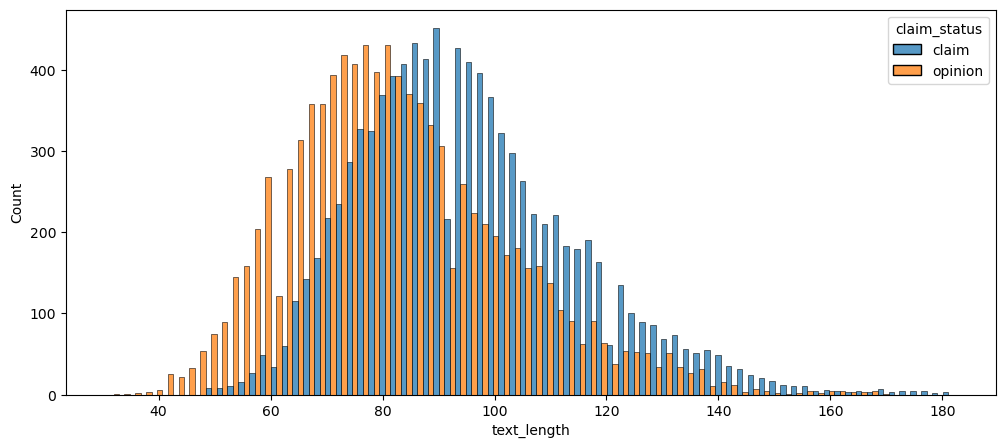

In [936]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot
plt.figure(figsize=(12,5))

sns.histplot(data=data, x='text_length', hue='claim_status', multiple='dodge');



Letter count distributions for both claims and opinions are approximately normal with a slight right skew. Claim videos tend to have more characters -about 13 more on average, as indicated in a previous cell.

**Feature selection and transformation**

In order to select features for the model, first I need to encode target and categorical variables.
I noticed that 'author_ban_status' variable has a possible value 'under review' with space between the words 'under' and 'review'. In order to avoid problems in future modeling, first I'll replace this space character with underline character "_".  

In [956]:
# Replace every instance of 'under review' value with 'under_review' value for 'author_ban_status' variable
data['author_ban_status'] = np.where(data['author_ban_status'] == 'under review', 'under_review', data['author_ban_status']) 
data['author_ban_status'].value_counts()

# Create a copy of the X data
X = data.copy()

# Drop unnecessary columns
X = X.drop(columns=['#', 'claim_status', 'video_id', 'video_transcription_text'])

# Encode target variable
data['claim_status'] = np.where(data['claim_status'] == 'claim', 1, 0)

# Dummy encode remaining categorical values
X = pd.get_dummies(X, drop_first=True, columns=['verified_status', 'author_ban_status'], dtype=int)

X.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under_review
0,59,343296.0,19425.0,241.0,1.0,0.0,97,0,0,1
1,32,140877.0,77355.0,19034.0,1161.0,684.0,107,0,0,0
2,31,902185.0,97690.0,2858.0,833.0,329.0,137,0,0,0
3,25,437506.0,239954.0,34812.0,1234.0,584.0,131,0,0,0
4,19,56167.0,34987.0,4110.0,547.0,152.0,128,0,0,0


### **Task 4: Split the data**

In [958]:
# Isolate target variable
y = data['claim_status']


In [960]:
# Isolate features

# Display first few rows of features dataframe
X.head()


,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under_review
0,59,343296.0,19425.0,241.0,1.0,0.0,97,0,0,1
1,32,140877.0,77355.0,19034.0,1161.0,684.0,107,0,0,0
2,31,902185.0,97690.0,2858.0,833.0,329.0,137,0,0,0
3,25,437506.0,239954.0,34812.0,1234.0,584.0,131,0,0,0
4,19,56167.0,34987.0,4110.0,547.0,152.0,128,0,0,0


#### **Task 5: Create train/validate/test sets**

Let's split data into training and testing sets, 80/20.

In [962]:
# Split the data into training and testing sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Next, I'll split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [964]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=0)


I should confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [966]:
# Get shape of each training, validation, and testing set
print("The shape of X_train is:", X_train.shape)
print("The shape of y_train is:", y_train.shape)
print("The shape of X_val is:", X_val.shape)
print("The shape of y_val is:", y_val.shape)
print("The shape of X_test is:", X_test.shape)
print("The shape of y_test is:", y_test.shape)


The shape of X_train is: (11450, 10)
The shape of y_train is: (11450,)
The shape of X_val is: (3817, 10)
The shape of y_val is: (3817,)
The shape of X_test is: (3817, 10)
The shape of y_test is: (3817,)


- The number of features (`10`) aligns between the training, validating and testing sets.
- The number of rows aligns between the features and the outcome variable for training (`11,450`) and both validation and testing data (`3,817`).

### **Task 6. Build models**


### **Build a random forest model**

Let's fit a random forest model to the training set. I'll use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [970]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [5, 7, None],
             'max_features': [0.3, 0.6],
            #  'max_features': 'auto'
             'max_samples': [0.7],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [75,100,200],
             }

# Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

In [972]:
%time
# Train the model
rf_cv.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [976]:
# Examine best recall score
### YOUR CODE HERE ###
rf_cv.best_score_

0.9908534395531852

In [978]:
# Examine best parameters
rf_cv.best_params_


{'max_depth': 5,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 75}

The model is performing excellent with average recall score of 0.9908 across the five cross-validation folds.
Let's also check the precision score to be sure the model is not classifying all samples as claims.

In [980]:
rf_cv_precision = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='precision')
rf_cv_precision.fit(X_train, y_train)
rf_cv_precision.best_score_

0.9996515584261854

After checking the best average precision score (0.9996), it is clear that this model is making almost perfect classifications.

### **Build an XGBoost model**

In [988]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

# Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [990]:
xgb_cv.best_score_

0.9898176171763818

XGBoost model also performs excellent with average recall score of 0.9898.
Let's also check the precision score.

In [992]:
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='precision')
xgb_cv.fit(X_train, y_train)
xgb_cv.best_score_

1.0

The XGBoost model also performs exceptionally well. Although its recall score is very slightly lower than the random forest model's, its precision score is perfect (1.0).
The Random Forest model has slightly better recall score than the XGBoost model, so it is a champion model. 

### **Task 7. Evaluate model**

Let's evaluate models against validation criteria.

#### **Random forest**

In [994]:
# Use the random forest "best estimator" model to get predictions on the encoded validation set
y_pred = rf_cv.best_estimator_.predict(X_val)

In [996]:
# Display the predictions on the encoded validation set
y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [998]:
# Display the true labels of the validation set
y_val

5846     1
12058    0
2975     1
8432     1
6863     1
        ..
6036     1
6544     1
2781     1
6426     1
4450     1
Name: claim_status, Length: 3817, dtype: int32

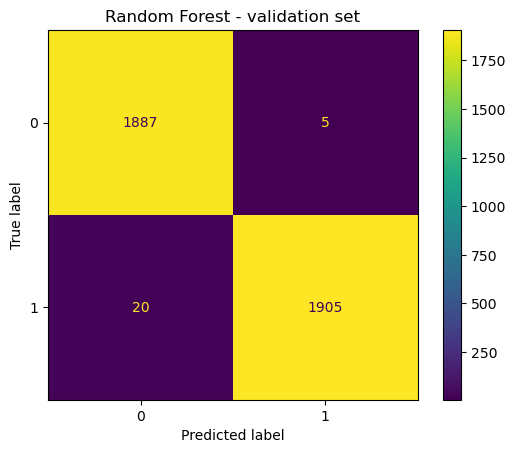

In [1000]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
cm = confusion_matrix(y_val, y_pred, labels=rf_cv.classes_)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)

# Plot confusion matrix
disp.plot()

# Display plot
plt.title("Random Forest - validation set")
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.

In [1002]:
# Create a classification report
# Create classification report for random forest model
target_labels = ["opinion", "claim"]
report = classification_report(y_val, y_pred, target_names=target_labels)
print(report)


              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1892
       claim       1.00      0.99      0.99      1925

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



The classification report shows extremely high values for both weighted precision and recall scores.
The confusion matrix indicates that out of 3.817 predictions, only 25 are miscorrect (0.7%). With only 20 false negative predictions out of 3.817 predictions, the model is almost perfectly predicting videos as claims and opinions.

Next, let's evaluate the XGBoost model.

#### **XGBoost**

In [1004]:
#Evaluate XGBoost model
y_pred = xgb_cv.best_estimator_.predict(X_val)
y_pred

array([1, 0, 1, ..., 1, 1, 1])

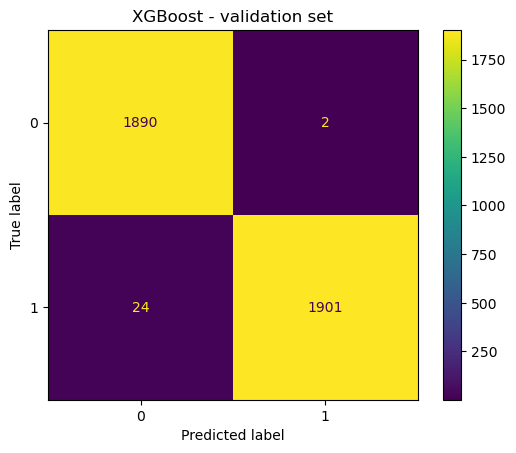

In [1006]:
# Compute values for confusion matrix
cm = confusion_matrix(y_val, y_pred, labels=xgb_cv.classes_)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)

# Plot confusion matrix
disp.plot()

# Display plot
plt.title("XGBoost - validation set")
plt.show()

In [692]:
# Create a classification report
report = classification_report(y_val, y_pred, target_names=target_labels)
print(report)


              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1892
       claim       1.00      0.99      0.99      1925

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



The results of the XGBoost model were also nearly perfect. However, its errors tended to be false negatives, which are bigger than at Random Forest model. Identifying claims was the priority, so it's important that the model be good at capturing all actual claim videos. The random forest model has a better recall score, and is therefore the champion model.

### **Use champion model to predict on test data**

In [1008]:
y_pred = rf_cv.best_estimator_.predict(X_test)

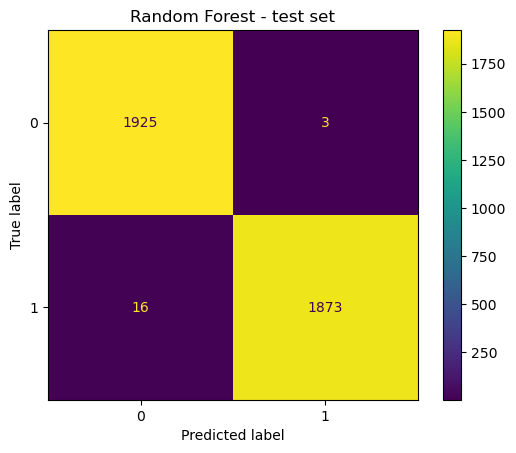

In [1010]:
# Compute values for confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=rf_cv.classes_)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)

# Plot confusion matrix
disp.plot()

# Display plot
plt.title("Random Forest - test set")
plt.show()


The champion model (RF) performs even better on the test set - it makes only 19 mispredictions that the actual video will be opinion, when it is actualy claim.  

#### **Feature importances of champion model**


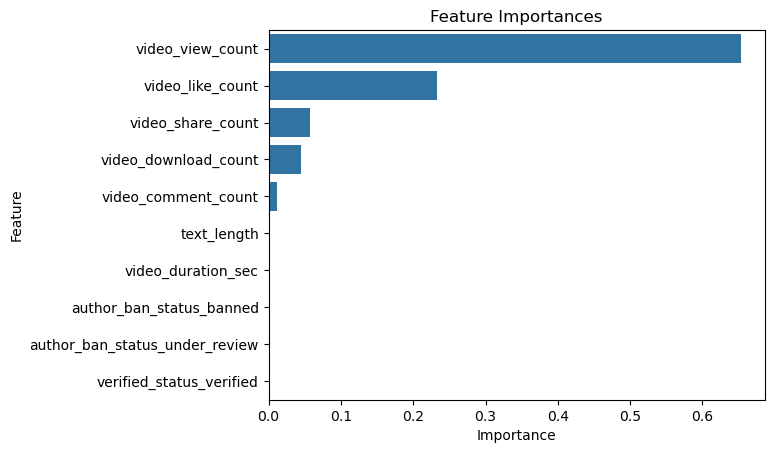

In [1044]:
# Get feature importances of champion model
feature_importances = rf_cv.best_estimator_.feature_importances_
features = X_test.columns

# Store them in a Data Frame
rf_feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort them by importance
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances   
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance_df)
plt.title('Feature Importances')
plt.show()



From the barplot it is clear that far most predictive feature is 'video_like_count', following with 'video_share_count', 'video_download_count' and 'video_comment_count' features. Ths was absolutely expected, because the previous EDA pointed to this conclusion.

### **Task 8. Conclusion**

I would strongly recommend using the RF model because it performed well on both the validation and test holdout data. Furthermore, both precision and F1 scores were consistently high. The model very successfully classified claims and opinions.

The model's most predictive features were all related to the user engagement levels associated with each video. It was classifying videos based on how many views, likes, shares, and downloads they received.

Because the model currently performs nearly perfectly, there is no need to engineer any new features.

The current version of the model does not need any new features. However, it would be helpful to have the number of times the video was reported. It would also be useful to have the total number of user reports for all videos posted by each author.

